<a href="https://colab.research.google.com/github/Gregory-lab-eng/python_Vistula/blob/main/Strakhov_75209_Yolov8_explainableAI_Vistula.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Instalacja niezbednych pakietow
!pip install ultralytics --upgrade
!pip install shap
!pip install easy-explain

In [1]:
# Import bibliotek i ustawienie dostepnego urzadzenia CPU/GPU
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [2]:
from ultralytics import YOLO

# ZAD1. Pobierzcie najlepsza wytrenowana wersje modelu Yolo z poprzednich zajec i wrzuccie ja do katalogu model pod nazwa yolo8_PCB_best.pt. Alternatywnie pobierzcie model z https://drive.google.com/drive/folders/1EixTp1c-1QUXgwldh3k9sHFxLuMFs3MN?usp=sharing
model = YOLO('/content/best.pt', task="detect").to(device)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [3]:
# ZAD2. Wybierzcie kilka obrazkow, ktore wykorzystywalismy na poprzednich zajeciach, z katalogu eval i wykonacie dla nich ponizsze 3 sekcje, aby zobaczyc wizualnie, ktore piksele mialy najwiekszy wplyw na detekcje obiektu.
# Test wykonajcie dla kazdej z kategorii, dla ktorych trenowalismy model (bylo 6 kategorii defektow)
from PIL import Image
from io import BytesIO
import requests

# Load the image
image_path1 = "/content/00041006_test_jpg.rf.612e798d3949ac4f3d8d73c32ee04a09.jpg"
image_path2 = "/content/00041010_test_jpg.rf.9650adc062cd125e565011a2edd7b6be.jpg"
image_path3 = "/content/00041020_test_jpg.rf.edf728862da8162b30fe6cda3e5488fe.jpg"

image_pil1 = Image.open(image_path1)
image_pil2 = Image.open(image_path2)
image_pil3 = Image.open(image_path3) # This is a PIL Image

In [4]:
import torchvision

desired_size = (512, 640)
transform = torchvision.transforms.Compose([
    torchvision.transforms.Resize(desired_size),
    torchvision.transforms.ToTensor(),
])
image_tensor1 = transform(image_pil1).to(device)
image_tensor2 = transform(image_pil2).to(device)
image_tensor3 = transform(image_pil3).to(device) # This is a PyTorch Tensor

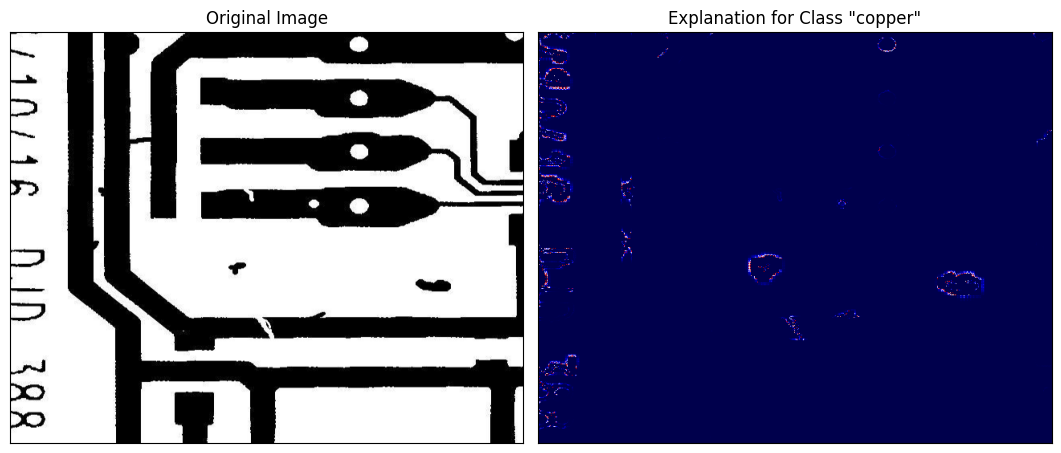

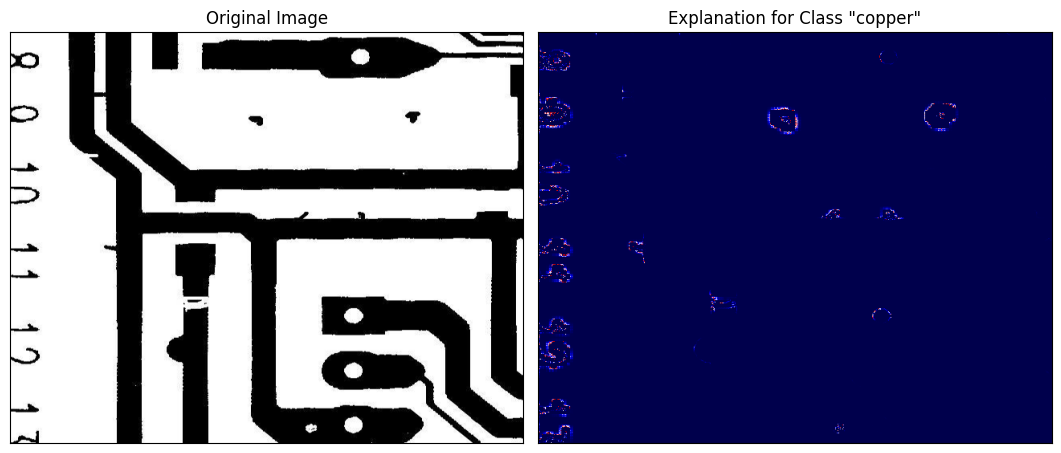

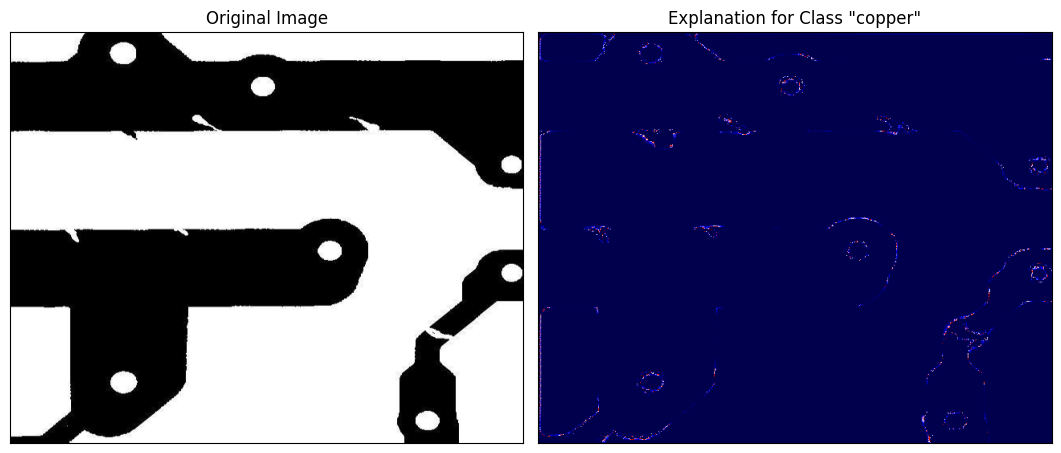

In [6]:
from easy_explain import YOLOv8LRP

lrp = YOLOv8LRP(model, power=2, eps=1, device=device)
explanation_lrp1 = lrp.explain(image_tensor1, cls='copper', contrastive=False).to(device)  # Use the tensor here

lrp.plot_explanation(frame=image_tensor1.cpu(), explanation=explanation_lrp1.cpu(), contrastive=False, cmap='seismic', title='Explanation for Class "copper"')

explanation_lrp2 = lrp.explain(image_tensor2, cls='copper', contrastive=False).to(device)  # Use the tensor here

lrp.plot_explanation(frame=image_tensor2.cpu(), explanation=explanation_lrp2.cpu(), contrastive=False, cmap='seismic', title='Explanation for Class "copper"')

explanation_lrp3 = lrp.explain(image_tensor3, cls='copper', contrastive=False).to(device)  # Use the tensor here

lrp.plot_explanation(frame=image_tensor3.cpu(), explanation=explanation_lrp3.cpu(), contrastive=False, cmap='seismic', title='Explanation for Class "copper"')